# KNN Classification Problem 1

### Task:
Implement a KNN model to classify the animals in to categories

In [5]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
#name is not required. We only need the type
data.pop('animal name')

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


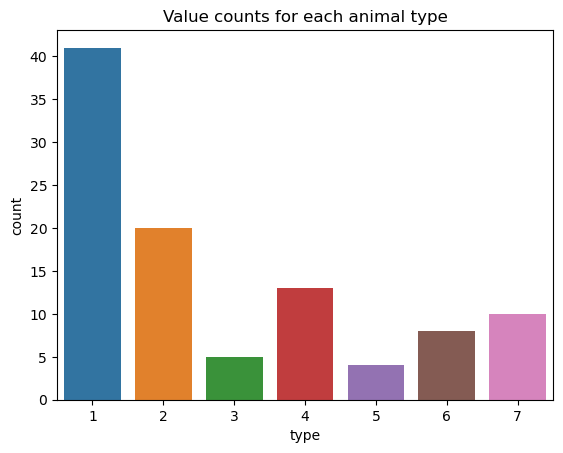

In [10]:
sns.countplot(data=data, x='type')
plt.title('Value counts for each animal type')
plt.show()

## Feature Engineering

All the features can be considered for model building.

In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN Classifier

In [13]:
model1 = KNeighborsClassifier(n_neighbors=1)

In [14]:
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Model Evaluation

In [15]:
from sklearn.metrics import classification_report

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion_matri(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()

In [19]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    cf_matrix = confusion_matrix(y_test,preds)
    confusion_matri(cf_matrix)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



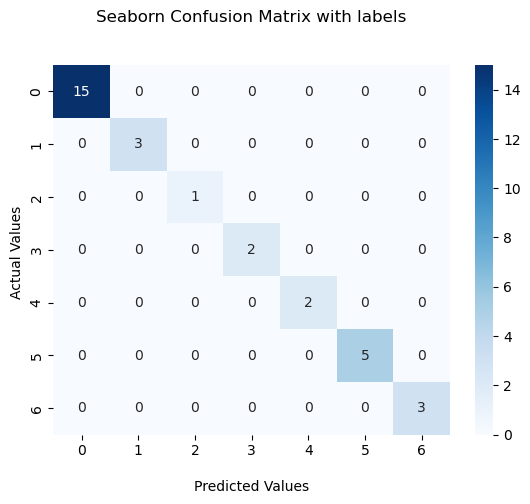

In [20]:
report(model1) 

Dataset is small. So near perfect values. Its more of an overfitted model

### K-fold validation

In [27]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model1, X_train, y_train, cv=kfold)
print(results.mean()) 

0.9714285714285715


highly accurate value but overfitted model

### Finding optimal value of K

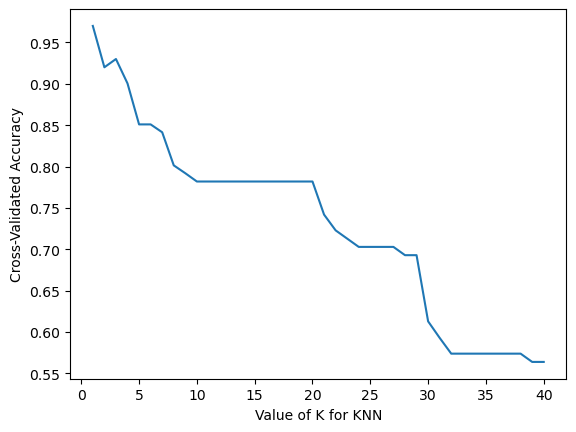

In [22]:
k_scores = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(range(1,41), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show() #Optimal value is 1 or 3

## Building Final Model

In [23]:
model_fnl = KNeighborsClassifier(n_neighbors=1)

In [24]:
model_fnl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



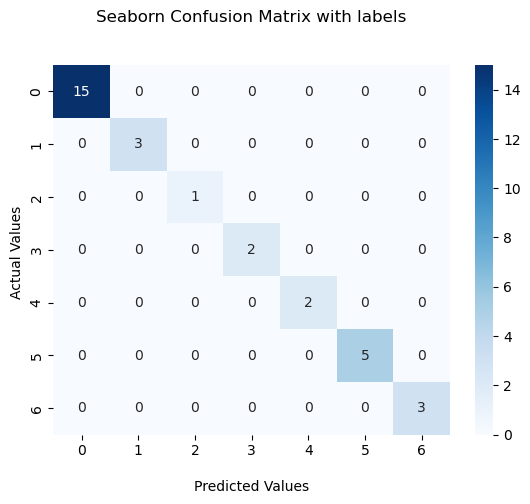

In [25]:
report(model_fnl)

In [26]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model_fnl, X, y, cv=kfold)
print(results.mean()) 

0.9800000000000001


Good values but overfitted model

- Since the dataset is very small, training doesnt make much sense.
- The result values are too good. Its a overfitted model
- Unseen data can generate wrong values in this data since its very much overfitted. 